# 모델 만들기
## Autograd
- 텐서가 연산을 할때 순전파 그래프에 의해 역전가 자동으로 정의... 개쇨야 ㅅㅂ

In [2]:
import matplotlib.pyplot as plt
import torch

In [3]:
# Autogrand
from torch.autograd import grad

# 1. 텐서 정의, 초기화
# int는 미분이 안된다고함.
x1 = torch.tensor(2., requires_grad=True)
x2 = torch.tensor(3., requires_grad=True)
x3 = torch.tensor(1., requires_grad=True)
x4 = torch.tensor(4., requires_grad=True)

# 수식
z1 = x1 * x2
z2 = x3 * x4
f = z1 + z2

# autograd 기울기 계산
df_dx = grad(outputs=f, inputs=[x1, x2, x3, x4])

print(f"grad = {df_dx}")
print(f"grad of x1 = {df_dx[0]}")
print(f"grad of x2 = {df_dx[1]}")
print(f"grad of x3 = {df_dx[2]}")
print(f"grad of x4 = {df_dx[3]}")


grad = (tensor(3.), tensor(2.), tensor(4.), tensor(1.))
grad of x1 = 3.0
grad of x2 = 2.0
grad of x3 = 4.0
grad of x4 = 1.0


In [4]:
# Backward
import torch.optim as optim

# 1. 텐서 정의, 초기화
# int는 미분이 안된다고함.
x1 = torch.tensor(2., requires_grad=False)  # 기울기 저장 안 함
x2 = torch.tensor(3., requires_grad=True)
x3 = torch.tensor(1., requires_grad=False)  # 기울기 저장 안 함
x4 = torch.tensor(4., requires_grad=True)


opt = optim.SGD([x1, x2, x3, x4],lr=0.001) #optim 설정
opt.zero_grad() # 기울기 0으로 초기화, 누적될 수도 있음.


# 수식
z1 = x1 * x2
z2 = x3 * x4
f = z1 + z2

# backward 기울기 계산 -> 모든 변수의 기울기를 자동으로 계산 + 저장
f.backward()    # loss (f)를 기준으로 backpropagation 진행, f를 만든 입력 텐서의 grad 속성에 미분값 채워넣음
# 즉, backward()는 “모든 가중치 W에 대해 기울기를 구해 grad에 저장”하는 단계예요.
opt.step()
# 역할: 옵티마이저(Optimizer)가 param.grad에 저장된 기울기를 이용해서 가중치를 업데이트하는 단계.


#backward = 가중치 계산
# step = 가중치 업데이트




print(f"grad = {df_dx}")
print(f"grad of x1 = {x1.grad}")
print(f"grad of x2 = {x2.grad}")
print(f"grad of x3 = {x3.grad}")
print(f"grad of x4 = {x4.grad}\n")


grad = (tensor(3.), tensor(2.), tensor(4.), tensor(1.))
grad of x1 = None
grad of x2 = 2.0
grad of x3 = None
grad of x4 = 1.0



In [5]:
# torch.nn
import torch.nn as nn # neural network

In [42]:
# nn없이 레이어
class FullyConnected(nn.Module):
    # nn.Linear(in_dim,out_dim) 없이 구현한것
    def __init__(self, input_dim, output_dim):
        self.weights = torch.randn(input_dim, output_dim) * 0.01
        self.bias = torch.zeros(output_dim)

    def forward(self, x):
        return x @ self.weights + self.bias

layer = FullyConnected(8, 4) # 8개 인풋, 4개의 아웃풋

x = torch.randn(2,8) # 8개의 입력을 가진 데이터가 2개
print(x)
y = layer.forward(x)
print(y)

tensor([[-1.1941, -0.0532, -0.3207,  0.6063, -0.5542,  0.5974, -0.3617, -0.0666],
        [-0.8428, -2.7480,  0.7010, -1.5241,  1.0707, -1.9948,  0.6173,  0.5380]])
tensor([[ 0.0237,  0.0023,  0.0047,  0.0025],
        [ 0.0116, -0.0066,  0.0205,  0.0854]])


In [7]:
# nn을 사용해서
layer = nn.Linear(8, 4)
x = torch.randn(2,8)
y = layer.forward(x)
print(y)

tensor([[-0.4804, -0.7668, -0.1747, -0.2444],
        [ 2.1246, -1.5497,  0.0620, -1.0131]], grad_fn=<AddmmBackward0>)


In [8]:
relu = nn.ReLU()
softmax = nn.Softmax(dim = 1)  # dim = 1?
# 이거 추가해서 사용하면됨.
# softmax dim: row wise softmax
# dim = 0으로 하면 column wise softmax

x = torch.randn(3,4)  # 4개 짜리가 1개
y = softmax(x)
print(x)
print(y)


tensor([[-2.2762,  0.9137, -0.6071, -0.3227],
        [ 1.6179,  1.3188,  0.3745, -0.8420],
        [ 0.2758, -0.6855,  1.0939,  0.0902]])
tensor([[0.0266, 0.6451, 0.1410, 0.1874],
        [0.4727, 0.3505, 0.1363, 0.0404],
        [0.2233, 0.0854, 0.5059, 0.1854]])


In [9]:
# 손실함수
loss_mse = nn.MSELoss()
loss_ce = nn.CrossEntropyLoss()
loss_bce = nn.BCELoss() # 얘는 출력함수 없어도됨. bcewithlogit이건 출력함수 추가해줘야됨

In [10]:
# 텐서의 차원
tensor_0d = torch.tensor(5)  # scalar
tensor_1d = torch.tensor([1,2,3])  # vector
tensor_2d = torch.tensor([[1,2,3],[4,5,6]])  # matrix
tensor_3d = torch.tensor([
    [[1, 2, 3], [4, 5, 6]],   # 첫 번째 블록
    [[1, 2, 3], [4, 5, 6]]    # 두 번째 블록
])
tensor_4d = torch.tensor([
    [   # 첫 번째 블록
        [[1, 2, 3], [4, 5, 6]],   # 첫 번째 채널
        [[7, 8, 9], [10, 11, 12]] # 두 번째 채널
    ],
    [   # 두 번째 블록
        [[13, 14, 15], [16, 17, 18]],   # 첫 번째 채널
        [[19, 20, 21], [22, 23, 24]]    # 두 번째 채널
    ]
])

# ndim 은 넘파이 속성, dim()은 토치 메소드. 둘이 똑같음.
print(f"0 = {tensor_0d.ndim}, size = {tensor_0d.size()}")
print(f"1 = {tensor_1d.dim()}, size = {tensor_1d.size()}")
print(f"2 = {tensor_2d.dim()}, size = {tensor_2d.size()}")
print(f"3 = {tensor_3d.dim()}, size = {tensor_3d.size()}")
print(f"4 = {tensor_4d.dim()}, size = {tensor_4d.size()}")

0 = 0, size = torch.Size([])
1 = 1, size = torch.Size([3])
2 = 2, size = torch.Size([2, 3])
3 = 3, size = torch.Size([2, 2, 3])
4 = 4, size = torch.Size([2, 2, 2, 3])


In [11]:
# 레이어의 입출력 차원
layer = nn.Linear(in_features=8, out_features=4)
x = torch.randn(1,8)
y = layer.forward(x)
print(x)
print(y)

tensor([[ 1.2910, -1.1385, -0.3648,  1.5792,  0.2521, -0.0358,  1.3150, -0.5852]])
tensor([[ 0.5124,  0.3128, -0.2066,  0.3657]], grad_fn=<AddmmBackward0>)


In [45]:
# nn.Module
class Mymodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(in_features=8, out_features=4)
        self.l2 = nn.Linear(in_features=4, out_features=6)
        self.l3 = nn.Linear(in_features=6, out_features=3)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.relu(self.l1(x))
        # 리니어거치고 활성화 함수. 아래의 두줄을 한 줄로 한 거임.
        # x = self.l1(x)
        # x = self.relu(x)

        x = self.relu(self.l2(x))

        y = self.l3(x) # 크로스엔트로피안에 소프트맥스갇 들어가잇음

        return y

model = Mymodel()
input_tensor = torch.randn(2,8)
res = model(input_tensor)

print(input_tensor)
print(res)

tensor([[-0.9216,  0.4942,  1.4437, -0.6321,  0.1237,  0.3321, -0.4937,  0.6304],
        [-0.2969, -0.0800, -0.8057,  0.5049, -1.5520, -0.0325, -0.9884,  0.2830]])
tensor([[ 0.3017,  0.1828, -0.1142],
        [ 0.3162,  0.2550, -0.0608]], grad_fn=<AddmmBackward0>)


In [46]:
model = Mymodel()
# input_tensor = torch.randn(2,8)
res = model(input_tensor)  # forward함수인데

print(input_tensor[1])
print(res[1])

tensor([-0.2969, -0.0800, -0.8057,  0.5049, -1.5520, -0.0325, -0.9884,  0.2830])
tensor([ 0.4864,  0.0271, -0.6029], grad_fn=<SelectBackward0>)


In [14]:
class Mymodel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.block = Mymodel() # subModule, self.backbone
        self.layer = nn.Linear(in_features=3, out_features=4)


    def forward(self, x):
        x = self.block(x) # mymodel을 통과 ( l1, l2, l3) 다 통과하고

        y = self.layer(x) # 추가된 레이어 통과

        return y

In [15]:
model2 = Mymodel2()
input_tensor = torch.randn(2,8)
res2 = model2(input_tensor)
print(input_tensor)
print(res2)

tensor([[-0.4976,  1.8498,  0.8036,  0.7130,  0.2779,  0.6621, -1.4506,  0.2836],
        [-0.5593,  0.4892, -0.1098,  1.4203, -1.2404,  0.3288, -0.5446, -1.0835]])
tensor([[ 0.0576, -0.2974,  0.3736,  0.0650],
        [ 0.0701, -0.2916,  0.3603,  0.0526]], grad_fn=<AddmmBackward0>)


In [16]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(in_features=8, out_features=4)
        self.l2 = nn.Linear(in_features=4, out_features=6)
        self.l3 = nn.Linear(in_features=6, out_features=3)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.relu(self.l1(x)) # 리니어거치고 활성화 함수. 아래의 두줄을 한 줄로 한 거임.
        # x = self.l1(x)
        # x = self.relu(x)

        x = self.relu(self.l2(x))

        y = self.l3(x) # 크로스엔트로피안에 소프트맥스갇 들어가잇음

        return y # y값은 Softmax 전에 나온 점수(raw logits).
		# 예: [2.1, -0.3, 1.5] 이런 식

In [17]:
# 위에 클래스로 만들어서 쌓은거랑 시퀀셜로 바로 한거랑 똑같음.
model = nn.Sequential(
    nn.Linear(in_features=8, out_features=4),
    nn.ReLU(),
    nn.Linear(in_features=4, out_features=6),
    nn.ReLU(),
    nn.Linear(in_features=6, out_features=3),
)

In [18]:
import torch
import torch.nn as nn

class ComplexModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l0_0 = nn.Linear(in_features=4, out_features=8)
        self.l0_1 = nn.Linear(in_features=6, out_features=4)
        self.l1_0 = nn.Linear(in_features=14, out_features=8)
        self.l1_1 = nn.Linear(in_features=14, out_features=2)
        self.relu = nn.ReLU()

    def forward(self, input0, input1, input2):
        h0_0 = self.relu(self.l0_0(input0))   # bs,4 -> (bs, 8)
        h0_1 = self.relu(self.l0_1(input1))   # bs,6-> (bs, 4)

        # 8 + 4 + 2 = 14  → l1_*와 in_features 일치
        h1 = torch.cat([h0_0, h0_1, input2], dim=1)  # (bs, 14)

        output0 = self.l1_0(h1)  # (bs, 14)-> (bs, 8)
        output1 = self.l1_1(h1)  # (bs, 14)-> (bs, 2)
        return output0, output1

# 테스트
model = ComplexModel()
bs = 4
x0 = torch.randn(bs, 4)
x1 = torch.randn(bs, 6)
x2 = torch.randn(bs, 2)
y0, y1 = model(x0, x1, x2)
print(y0.shape, y1.shape)  # torch.Size([4, 8]) torch.Size([4, 2])

torch.Size([4, 8]) torch.Size([4, 2])


In [19]:
class ComplexModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense_1 = nn.Linear(in_features=10, out_features=16)
        self.dense_2 = nn.Linear(in_features=5, out_features=16)
        self.dense_3 = nn.Linear(in_features=32, out_features=32)
        self.dense_4 = nn.Linear(in_features=32, out_features=32)

        self.relu = nn.ReLU()

        self.aux_output = nn.Linear(in_features=16, out_features=1)
        self.main_output = nn.Linear(in_features=32, out_features=1)


    def forward(self, input1, input2):
        x1 = self.relu(self.dense_1(input1))
        out1 = self.aux_output(x1)


        x2 = self.relu(self.dense_2(input2))
        x2 = torch.concat([x1,x2], dim = 1) # concat, cat 둘이 완전 똑같음.
        # 이어 붙여서 인풋 32, 아웃푹 32가 나옴. 이걸 덴스3에다가 집어넣음
        x2 = self.relu(self.dense_3(x2))
        x2 = self.relu(self.dense_4(x2))

        out2 = self.main_output(x2)

        return out1, out2


model = ComplexModel2()

bs = 6
input1 = torch.randn(bs,10)
input2 = torch.randn(bs,5)

output1, output2 = model(input1, input2)
print(output1)
print("\n")
print(output2)


tensor([[-0.0400],
        [-0.1019],
        [-0.2558],
        [-0.4528],
        [-0.2427],
        [-0.5153]], grad_fn=<AddmmBackward0>)


tensor([[0.1011],
        [0.1258],
        [0.1229],
        [0.0922],
        [0.0786],
        [0.1612]], grad_fn=<AddmmBackward0>)


In [20]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(in_features=8, out_features=4)
        self.l2 = nn.Linear(in_features=4, out_features=6)
        self.l3 = nn.Linear(in_features=6, out_features=3)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.relu(self.l1(x)) # 리니어거치고 활성화 함수. 아래의 두줄을 한 줄로 한 거임.
        # x = self.l1(x)
        # x = self.relu(x)

        x = self.relu(self.l2(x))

        y = self.l3(x) # 크로스엔트로피안에 소프트맥스갇 들어가잇음

        return y


model = MyModel().to('cpu')
print(model)

MyModel(
  (l1): Linear(in_features=8, out_features=4, bias=True)
  (l2): Linear(in_features=4, out_features=6, bias=True)
  (l3): Linear(in_features=6, out_features=3, bias=True)
  (relu): ReLU()
)


In [21]:
print(list(model.children()),"\n") # 모델의 구성요소 보기. 프린트랑 뭐 거의 똑같다고 봐도 됨
# submodule + name
for named_child in model.named_children():
    print(named_child)

[Linear(in_features=8, out_features=4, bias=True), Linear(in_features=4, out_features=6, bias=True), Linear(in_features=6, out_features=3, bias=True), ReLU()] 

('l1', Linear(in_features=8, out_features=4, bias=True))
('l2', Linear(in_features=4, out_features=6, bias=True))
('l3', Linear(in_features=6, out_features=3, bias=True))
('relu', ReLU())


In [22]:
# param info

for param in model.parameters():
    print(param)
    break

Parameter containing:
tensor([[ 0.2623, -0.0350,  0.2335,  0.3123, -0.0777, -0.0813,  0.2793,  0.0124],
        [-0.2841, -0.2556, -0.3433, -0.0389, -0.0832, -0.2697, -0.0525, -0.2950],
        [ 0.2728,  0.0317,  0.3501,  0.1028, -0.3123,  0.1720,  0.1445, -0.0917],
        [ 0.3527,  0.1006,  0.0878,  0.3343,  0.2133, -0.1909,  0.0741,  0.1728]],
       requires_grad=True)


In [23]:
# 파라미터 정보 + 이름
for named_param in model.named_parameters():
    print(named_param)

('l1.weight', Parameter containing:
tensor([[ 0.2623, -0.0350,  0.2335,  0.3123, -0.0777, -0.0813,  0.2793,  0.0124],
        [-0.2841, -0.2556, -0.3433, -0.0389, -0.0832, -0.2697, -0.0525, -0.2950],
        [ 0.2728,  0.0317,  0.3501,  0.1028, -0.3123,  0.1720,  0.1445, -0.0917],
        [ 0.3527,  0.1006,  0.0878,  0.3343,  0.2133, -0.1909,  0.0741,  0.1728]],
       requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.1407,  0.2477, -0.1987, -0.1435], requires_grad=True))
('l2.weight', Parameter containing:
tensor([[ 1.1863e-02,  1.2617e-01, -3.9668e-01, -4.9666e-01],
        [ 3.3512e-01,  2.9212e-01, -2.6733e-04,  1.1679e-01],
        [ 7.6486e-02, -4.1906e-01, -6.0308e-02,  2.2901e-02],
        [ 2.6011e-01, -1.9582e-01, -2.7946e-01,  3.6514e-01],
        [ 5.3099e-02,  3.0947e-01,  3.1366e-01,  4.6626e-01],
        [-1.1358e-01, -2.8187e-01,  1.0114e-01,  2.0594e-01]],
       requires_grad=True))
('l2.bias', Parameter containing:
tensor([-0.3918,  0.1965, -0.2762,  

In [24]:
for i in model2.named_parameters():
    print(i)

('block.l1.weight', Parameter containing:
tensor([[ 0.1865,  0.0941, -0.3351,  0.1232, -0.1330,  0.2441, -0.2532, -0.2370],
        [-0.2844, -0.0273,  0.2242,  0.0997, -0.2120,  0.2376, -0.1483, -0.3219],
        [ 0.1074, -0.1886, -0.1544, -0.2423, -0.0347, -0.0066, -0.0928, -0.2346],
        [ 0.3508,  0.1962,  0.1280, -0.1323,  0.1576,  0.0063, -0.2696, -0.2921]],
       requires_grad=True))
('block.l1.bias', Parameter containing:
tensor([ 0.2021,  0.0953, -0.3369, -0.1648], requires_grad=True))
('block.l2.weight', Parameter containing:
tensor([[ 0.3187,  0.2157, -0.4134,  0.4787],
        [ 0.1174, -0.3010, -0.2851,  0.1488],
        [-0.1561, -0.2619,  0.0859,  0.1108],
        [ 0.2227, -0.2901, -0.3341,  0.0272],
        [ 0.0770,  0.3127,  0.3333,  0.3175],
        [-0.1204,  0.4748, -0.1786,  0.3959]], requires_grad=True))
('block.l2.bias', Parameter containing:
tensor([ 0.1770, -0.2760, -0.2726,  0.2010,  0.4379, -0.4251],
       requires_grad=True))
('block.l3.weight', Para

In [25]:
for name, param in model.named_parameters():
    print(name)
    print(param.device)

l1.weight
cpu
l1.bias
cpu
l2.weight
cpu
l2.bias
cpu
l3.weight
cpu
l3.bias
cpu


# 모델 학습하기

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [27]:
# 데이터 불러오기
abalone_df = pd.read_csv(
    'https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv',
    names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
           'Viscera weight', 'Shell weight', 'Age']
)

# 입력과 타깃 나누기
input_data = abalone_df.drop(columns=['Age']).to_numpy().astype(np.float32)
target_data = abalone_df['Age'].to_numpy().astype(np.float32)

In [28]:
class AbaloneDataset(Dataset):
    def __init__(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data


    def __len__(self):
        return len(self.input_data)


    def __getitem__(self, index):
        return (torch.tensor(self.input_data[index], dtype=torch.float32),
                torch.tensor(self.target_data[index], dtype=torch.float32))



In [75]:
# 학습/검증/테스트
train_size = int(0.8 * len(abalone_df))
val_size = int(len(abalone_df) * 0.1)
test_size = int(len(abalone_df) * 0.1)

train_inputs = input_data[0:train_size]
train_targets = target_data[0:train_size]

val_inputs = input_data[train_size:train_size+val_size]
val_targets = target_data[train_size:train_size+val_size]

test_inputs = input_data[train_size + val_size:]
test_targets = target_data[train_size + val_size:]


# Standardization
scaler = StandardScaler()
scaler.fit(train_inputs)


train_inputs_scaled = scaler.transform(train_inputs)
val_inputs_scaled = scaler.transform(val_inputs)
test_inputs_scaled = scaler.transform(test_inputs)

# 데이터셋+ 데이터로더
train_dataset = AbaloneDataset(train_inputs_scaled, train_targets)
val_dataset = AbaloneDataset(val_inputs_scaled, val_targets)
test_dataset = AbaloneDataset(test_inputs_scaled, test_targets)


train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=32,)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=32, drop_last=False)

In [76]:
class AbaloneModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=7, out_features=32)
        self.fc2 = nn.Linear(in_features=32, out_features=16)
        self.fc3 = nn.Linear(in_features=16, out_features=8)
        self.fc4 = nn.Linear(in_features=8, out_features=1)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x



model = AbaloneModel().to('cpu')
print(model)


AbaloneModel(
  (fc1): Linear(in_features=7, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


In [77]:
plt.show()
# 모델 저장
# state_dict() 모델의 파라미터를 담고있는 딕셔너리
state_dict = model.state_dict()
torch.save(state_dict, 'model.pt')
print(state_dict)

model_loaded = AbaloneModel()
model_loaded.load_state_dict(state_dict)

OrderedDict([('fc1.weight', tensor([[-0.2903,  0.0072, -0.2097,  0.1445,  0.0315, -0.3585,  0.2532],
        [-0.3500, -0.1396,  0.2421,  0.0562, -0.0429,  0.0097, -0.0703],
        [ 0.1288, -0.0780, -0.1336,  0.2100,  0.2150, -0.1884, -0.1588],
        [-0.0429,  0.2572, -0.2870,  0.0016,  0.1023,  0.1437,  0.0884],
        [ 0.1773,  0.1066,  0.3279, -0.2457, -0.1346,  0.2722,  0.1095],
        [-0.2936, -0.2757, -0.0270, -0.2615,  0.0208,  0.0842, -0.1115],
        [ 0.2586, -0.0031, -0.0715, -0.2096,  0.3354,  0.0610,  0.0300],
        [ 0.1779, -0.1180, -0.2542, -0.2229,  0.1883,  0.0888, -0.0151],
        [ 0.2279, -0.2943, -0.1867, -0.0157, -0.2862, -0.1870,  0.1563],
        [ 0.0029, -0.3689,  0.1446,  0.2777, -0.0617,  0.3352, -0.1833],
        [-0.0806, -0.3711, -0.1753,  0.3427, -0.3722, -0.2944, -0.2188],
        [ 0.2882,  0.2695, -0.2912, -0.0455, -0.0404,  0.3770, -0.1683],
        [ 0.1590, -0.1454,  0.2180,  0.1539, -0.3421,  0.0497,  0.1073],
        [ 0.0095,  0.34

<All keys matched successfully>

In [78]:
epochs = 10
loss_fn = nn.MSELoss()
opt = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) # momentum?
step = 0  # opt.step()이랑 다른거임

#왜 sgd, momentum이 높으면 지그재그로 안 가나?


for epoch in range(epochs):
    model.train() # 트레인 할게~

    for train_batch in train_dataloader:

        x_train, y_train = train_batch #
        pred = model(x_train)          # (B, 1)
        pred = pred.squeeze(-1)        # (B,)
        loss = loss_fn(pred, y_train)  # OK
        # pred, y_train wise loss function calculate
        loss.backward()
        opt.step() # update params
        opt.zero_grad() # Weight init
        step += 1

        if step % 100 == 0:
            print(f"step = {step} , train loss = {loss.item():.4f}")


    model.eval() # 평가할게~
    # with안에서는 따로 가중치 계산 x
    with torch.no_grad():
        losses = []
        for val_batch in val_dataloader:
            x_val, y_val = val_batch
            pred = model(x_val)
            loss = loss_fn(pred, y_val)
            losses.append(loss.item())
        val_loss_avg = sum(losses) / len(losses)
        print(f"val_loss = {val_loss_avg:.4f}")

    if epoch % 10 == 0:
        torch.save(model.state_dict(), "model.pt")

    torch.save(model.state_dict(), f'model_{epoch}.pt')


/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


val_loss = 11.4999
step = 100 , train loss = 4.2803
val_loss = 12.8422
step = 200 , train loss = 5.6418
val_loss = 14.5534
step = 300 , train loss = 9.1805
val_loss = 14.3049
step = 400 , train loss = 4.0624
val_loss = 16.5725
val_loss = 14.9750
step = 500 , train loss = 5.2164
val_loss = 14.5658
step = 600 , train loss = 4.9560
val_loss = 14.6424
step = 700 , train loss = 7.7813
val_loss = 16.9556
step = 800 , train loss = 3.2165
val_loss = 13.3068


In [83]:
model.eval() # 평가할게~
# with안에서는 따로 가중치 계산 x
with torch.no_grad():
    losses = []
    preds = []
    targets = []
    for test_batch in test_dataloader:
        x_test, y_test = test_batch
        pred = model(x_test)
        pred = pred.squeeze()
        loss = loss_fn(pred, y_test)
        losses.append(loss.item())

        preds.extend(pred.cpu().numpy())
        targets.extend(y_test.cpu().numpy())


    test_loss_avg = sum(losses) / len(losses)
    print(f"test_loss = {test_loss_avg:.4f}")
    print(len(preds), len(targets))


test_loss = 5.4726
332 332


In [84]:
# preds = [1, 2]
# preds.extend([3, 4])
# print(preds)
print(pred.shape, y_test.shape)
print(len(preds))

torch.Size([12]) torch.Size([12])
332


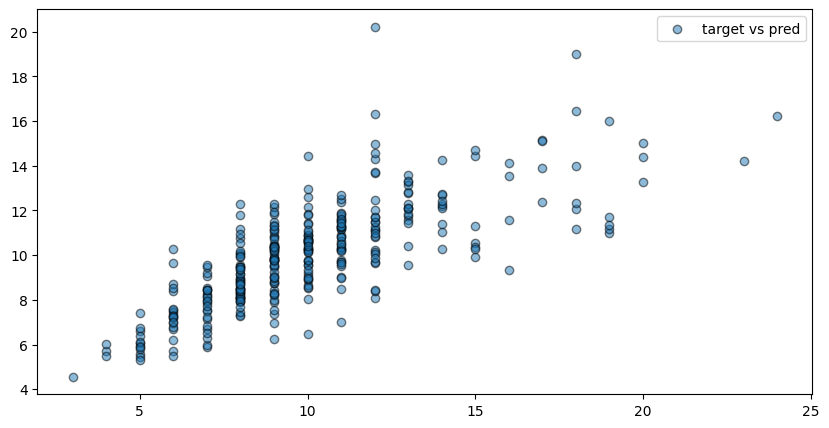

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.scatter(targets, preds, alpha=0.5, label='target vs pred', edgecolor='k')
plt.legend()
plt.show()

In [35]:
# 모델 저장
# state_dict() 모델의 파라미터를 담고있는 딕셔너리
state_dict = model.state_dict()
torch.save(state_dict, 'model.pt')
print(state_dict)

model_loaded = AbaloneModel()
model_loaded.load_state_dict(state_dict)



OrderedDict([('fc1.weight', tensor([[-3.4509e-01, -4.9347e-02,  7.4244e-02,  7.4733e-01, -9.8844e-01,
         -1.1354e-01,  4.5775e-01],
        [-4.2911e-02,  6.4801e-02, -2.9638e-03, -2.7469e-02, -9.7057e-02,
          1.2332e-01,  1.3854e-01],
        [ 3.2665e-01, -2.3511e-01,  3.5741e-01,  2.7186e-03, -8.2263e-02,
         -1.2999e-01,  1.9601e-01],
        [ 3.4490e-02,  2.5198e-01, -3.2783e-01,  5.5293e-02,  3.2975e-01,
          1.7310e-01, -2.4642e-01],
        [-3.1720e-01, -2.6169e-01, -3.2426e-01,  5.1267e-01, -2.5387e-03,
          9.3129e-02,  3.7915e-02],
        [-2.5169e-02, -4.1129e-01, -2.1120e-01, -8.8517e-02,  4.4600e-01,
         -1.1514e-01, -1.4983e-01],
        [-2.7957e-01,  4.1981e-02,  4.7495e-02,  3.4245e-01, -7.7937e-02,
         -3.7816e-01,  3.3761e-01],
        [ 2.1115e-01,  6.0330e-02,  5.8089e-03,  2.6300e-01,  2.4062e-02,
         -1.1583e-01,  1.2934e-01],
        [-1.5017e-02,  2.9256e-02, -9.8190e-02,  8.0454e-02, -1.1804e-01,
         -3.0803e-

<All keys matched successfully>

In [41]:

import torch.nn as nn

#
# relu = nn.ReLU()
# y = relu(x)

# 둘이 같은거임
# y = F.relu(x)

loss_fn = nn.MSELoss()
pred = pred
print(pred.shape)
print(y_train.shape)
# loss = loss_fn(pred, y_train)

# F.mse_loss(pred, y_train)



torch.Size([12])
torch.Size([32])


In [188]:
x = torch.ones(1,3)
x = x.squeeze_()
print(x.shape)

torch.Size([3])
